#df is the train dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ml_kaggle_practice/phy_chem_bio/train.csv')

In [3]:
df2=pd.read_csv('/content/drive/MyDrive/ml_kaggle_practice/phy_chem_bio/test.csv')



 Holup


are these reddit commentsss???

 That's what it seems like

In [4]:
df.Comment.value_counts()[(df.Comment.value_counts()>2)]

,count
Comment,
[removed],114
[deleted],65
Thank you!,7
Thank you,5
Yes,5
Thanks!,5
Forbidden ice cream,4
Fair enough.,4
u/savevideo,4


[removed] and [deleted] are unnecessary

those must've been very offensive/inaccurate to even be deleted by a reddit mod.

so let's just impute them with


`"offensive line"`



In [5]:
df2.Comment.value_counts()[(df2.Comment.value_counts()>2)]

,count
Comment,


No such removed or deleted in the test dataset!!!!

Let's get back to imputing

In [6]:
X_train=df['Comment']
y_train=df['Topic']

In [7]:
def rep(row):
  if row=='[removed]' or row=='[deleted]':
    row=np.nan
  return row

In [8]:
X_train=X_train.apply(rep)

In [9]:
X_train.isna().sum()

179

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si=SimpleImputer(strategy='constant',fill_value='offensive line')

In [12]:
X_train_imp=si.fit_transform(pd.DataFrame(X_train))

In [13]:
X_train=pd.DataFrame(X_train_imp,columns=['Comment'])

In [14]:
y_train.value_counts()

,count
Topic,
Biology,3591
Chemistry,2920
Physics,2184


In [15]:
y_train.isna().sum()

0

Phew!! no issues in the target here

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

The plan is simple create a pipe where the first step is vectorize then feed that to multinomialNB

In [17]:
pipe=Pipeline([
    ('vecto',CountVectorizer()),
    ('nb',MultinomialNB())
])

Let's detour a bit and test our CountVectorizer

In [18]:
l=['Hi there! How are you']

In [19]:
cv=CountVectorizer()
cv.fit_transform(l)
cv.vocabulary_

{'hi': 1, 'there': 3, 'how': 2, 'are': 0, 'you': 4}

In [20]:
cv2=CountVectorizer()

In [21]:
X_c=cv2.fit_transform(X_train)

In [22]:
cv2.vocabulary_

{'comment': 0}

Wellll this is very wierd

but let's solve thissss


In [23]:
X_list=[]
for i in X_train.Comment:
  X_list.append(i)

In [24]:
len(X_list)

8695

In [25]:
X_c=cv2.fit_transform(X_list)

In [26]:
len(cv2.vocabulary_)

18177

In [27]:
pipe.fit(X_list,y_train)

Pipeline(steps=[('vecto', CountVectorizer()), ('nb', MultinomialNB())])

In [28]:
y_pred_train=pipe.predict(X_list)

In [29]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

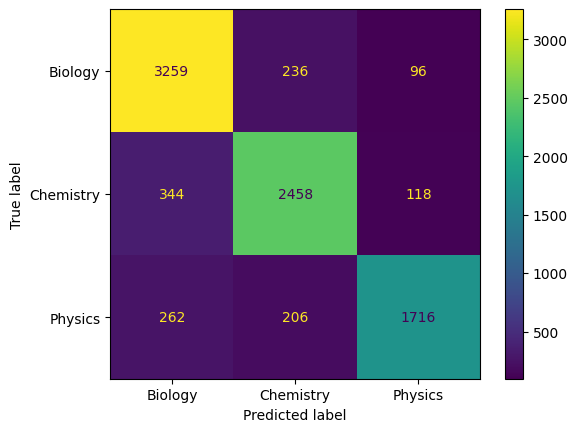

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train)

In [31]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

     Biology       0.84      0.91      0.87      3591
   Chemistry       0.85      0.84      0.84      2920
     Physics       0.89      0.79      0.83      2184

    accuracy                           0.85      8695
   macro avg       0.86      0.85      0.85      8695
weighted avg       0.86      0.85      0.85      8695



# Let's read the erronous responses ehhh

In [32]:
X_train[y_pred_train!=y_train]

,Comment
5,I meant that the question itself is unclear.
17,"Hey, you’ll get there one day."
37,Potato
46,offensive line
68,Depends how strong your floor is too.
...,...
8678,Does it make the toaster dance?
8682,It’s a kind of magic
8683,"People with ""raging curiosity"" go far in life...."
8686,"Are you wanting this to be a ""peel off"" mask? ..."


Yeah these are really general so the model wasn't bad


also, context could help because,

 `potato`??!!???!!

#After observing

By default CountVectorizer lower cases all words let's make it false as Capitalising in terms of texting is a certain form of expression

# A function that outputs the field when the input is the comment

In [33]:
def pred_field(com):
  return gs2.predict([com])[0]

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
pg={
    'vecto__lowercase':[True,False]
}

In [36]:
gs=GridSearchCV(pipe,pg,cv=5)

In [37]:
gs.fit(X_list,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'vecto__lowercase': [True, False]})

In [38]:
gs.best_params_

{'vecto__lowercase': True}

# AHHHHHHHH!!!!! a shocker. I thought turing it down would boost it.


I'll try it manually too

In [39]:
pg={
    'vecto__lowercase':[False]
}
gs2=GridSearchCV(pipe,pg,cv=5)

In [40]:
gs2.fit(X_list,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'vecto__lowercase': [False]})

In [41]:
y_pred2_train=gs2.predict(X_list)

In [42]:
print(classification_report(y_train,y_pred2_train)) #turned lowercase to False

              precision    recall  f1-score   support

     Biology       0.85      0.91      0.88      3591
   Chemistry       0.86      0.86      0.86      2920
     Physics       0.90      0.79      0.84      2184

    accuracy                           0.86      8695
   macro avg       0.87      0.85      0.86      8695
weighted avg       0.87      0.86      0.86      8695



In [43]:
print(classification_report(y_train,y_pred_train))  # base case

              precision    recall  f1-score   support

     Biology       0.84      0.91      0.87      3591
   Chemistry       0.85      0.84      0.84      2920
     Physics       0.89      0.79      0.83      2184

    accuracy                           0.85      8695
   macro avg       0.86      0.85      0.85      8695
weighted avg       0.86      0.85      0.85      8695



this is obviously better duuuhhhh

# Why just naive-bayes ???

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
pipe2=Pipeline([
    ('vecto',CountVectorizer(lowercase=False)),
    ('logreg',LogisticRegression(n_jobs=-1))
])

In [46]:
pipe2.fit(X_list,y_train)

Pipeline(steps=[('vecto', CountVectorizer(lowercase=False)),
                ('logreg', LogisticRegression(n_jobs=-1))])

In [47]:
y_pred_log_train=pipe2.predict(X_list)

In [48]:
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

     Biology       0.96      0.97      0.97      3591
   Chemistry       0.95      0.96      0.95      2920
     Physics       0.96      0.93      0.95      2184

    accuracy                           0.96      8695
   macro avg       0.96      0.95      0.96      8695
weighted avg       0.96      0.96      0.96      8695



Well, is this overfitting or is this really good??

In [49]:
X_test=df2['Comment']
y_test=df2['Topic']

In [50]:
y_pred_test=pipe.predict(X_test)

In [51]:
y_pred2_test=gs2.predict(X_test)

In [52]:
y_pred_log_test=pipe2.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred_test))#base case

              precision    recall  f1-score   support

     Biology       0.88      0.85      0.86       614
   Chemistry       0.79      0.84      0.82       506
     Physics       0.87      0.84      0.86       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.85      0.85      0.85      1586



In [54]:
print(classification_report(y_test,y_pred2_test)) # after turning lowercase to False

              precision    recall  f1-score   support

     Biology       0.87      0.84      0.86       614
   Chemistry       0.78      0.83      0.80       506
     Physics       0.84      0.83      0.84       466

    accuracy                           0.83      1586
   macro avg       0.83      0.83      0.83      1586
weighted avg       0.83      0.83      0.83      1586



In [55]:
print(classification_report(y_test,y_pred_log_test)) # logistic regression

              precision    recall  f1-score   support

     Biology       0.83      0.81      0.82       614
   Chemistry       0.74      0.79      0.76       506
     Physics       0.80      0.77      0.79       466

    accuracy                           0.79      1586
   macro avg       0.79      0.79      0.79      1586
weighted avg       0.79      0.79      0.79      1586



Ahhh it was overfitting afterall  


or was it???

(insert Vsauce theme)

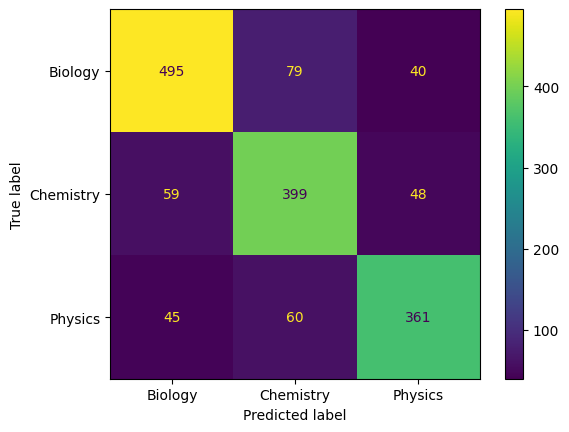

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_test)

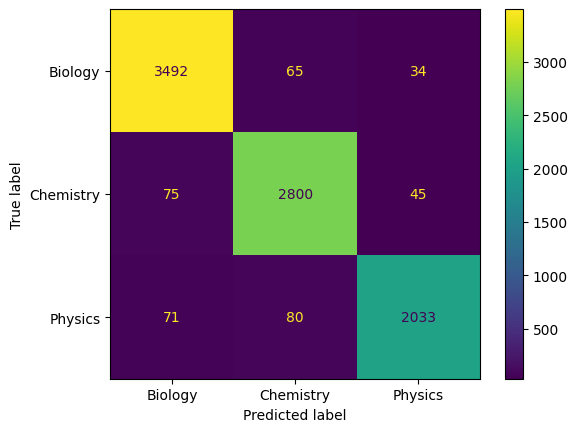

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_log_train)

I can observe how Naive-Bayes gave similar results for both test and train.

Logistic Regression has overfitted. Let's regularize it

Also note that the countVectorizer creates a matrix on word count.



Let's try with


`TfidfVectorizer`

after scaling it.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfpipe=Pipeline([
    ('tfv',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

In [60]:
tfpipe.fit(X_list,y_train)

Pipeline(steps=[('tfv', TfidfVectorizer()), ('nb', MultinomialNB())])

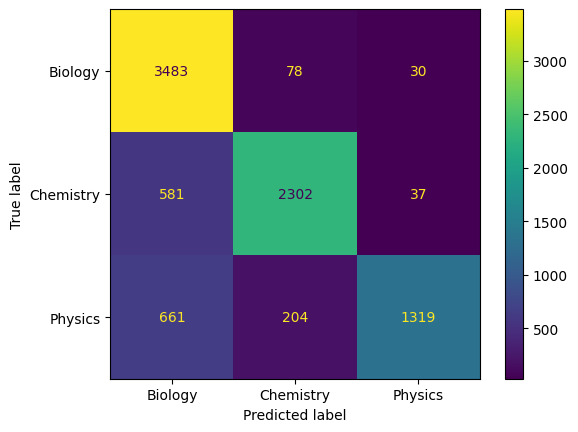

In [61]:
ConfusionMatrixDisplay.from_estimator(tfpipe,X_list,y_train)

In [62]:
y_pred_tfdi_train=tfpipe.predict(X_list)

In [63]:
print(classification_report(y_train,y_pred_tfdi_train))

              precision    recall  f1-score   support

     Biology       0.74      0.97      0.84      3591
   Chemistry       0.89      0.79      0.84      2920
     Physics       0.95      0.60      0.74      2184

    accuracy                           0.82      8695
   macro avg       0.86      0.79      0.80      8695
weighted avg       0.84      0.82      0.81      8695



Observation: High precision with physics and high recall with biology.


Out of all comments it thought to be Physics, it was correct 95% of the time.

It has correctly classified Biology comments 74% times

In [64]:
tfpipe2=Pipeline([
    ('tfv',TfidfVectorizer(lowercase=False)),
    ('nb',MultinomialNB())
])

In [65]:
tfpipe2.fit(X_list,y_train)

Pipeline(steps=[('tfv', TfidfVectorizer(lowercase=False)),
                ('nb', MultinomialNB())])

In [66]:
y_pred_tf2_train=tfpipe2.predict(X_list)

In [67]:
print(classification_report(y_train,y_pred_tf2_train))

              precision    recall  f1-score   support

     Biology       0.74      0.98      0.84      3591
   Chemistry       0.90      0.80      0.85      2920
     Physics       0.96      0.61      0.74      2184

    accuracy                           0.82      8695
   macro avg       0.87      0.79      0.81      8695
weighted avg       0.85      0.82      0.82      8695



In [68]:
df[y_train!=y_pred_tf2_train]

,Id,Comment,Topic
1,0xbf0,Is it so hard to believe that there exist part...,Physics
5,0xb39,I meant that the question itself is unclear.,Chemistry
16,0xaf2,Realistically you’d be better off just buying ...,Chemistry
17,0x1386,"Hey, you’ll get there one day.",Chemistry
20,0x10aa,"Funny video, but I hate ad reads mid-video. I'...",Physics
...,...,...,...
8669,0xda2,Thank you!,Chemistry
8674,0x791,"i’m also really good at statistics, but not ca...",Chemistry
8682,0x1a9,It’s a kind of magic,Physics
8683,0x27b1,"People with ""raging curiosity"" go far in life....",Physics


In [69]:
tflog=Pipeline([
    ('vectin',TfidfVectorizer(lowercase=False)),
    ('log',LogisticRegression())
])

In [70]:
tflog.fit(X_list,y_train)
y_pred_tflog_train=tflog.predict(X_list)

In [71]:
print(classification_report(y_train,y_pred_tflog_train))

              precision    recall  f1-score   support

     Biology       0.87      0.95      0.91      3591
   Chemistry       0.90      0.89      0.90      2920
     Physics       0.93      0.80      0.86      2184

    accuracy                           0.89      8695
   macro avg       0.90      0.88      0.89      8695
weighted avg       0.90      0.89      0.89      8695



In [72]:
y_pred_tflog_test=tflog.predict(X_test)

In [73]:
y_pred_tf2_test=tfpipe2.predict(X_test)

In [74]:
y_pred_tfdi_test=tfpipe.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred_tflog_test)) # log reg

              precision    recall  f1-score   support

     Biology       0.79      0.84      0.81       614
   Chemistry       0.78      0.79      0.78       506
     Physics       0.85      0.77      0.81       466

    accuracy                           0.80      1586
   macro avg       0.81      0.80      0.80      1586
weighted avg       0.81      0.80      0.80      1586



In [76]:
print(classification_report(y_test,y_pred_tf2_test))#after lowercase turned to False

              precision    recall  f1-score   support

     Biology       0.66      0.95      0.78       614
   Chemistry       0.80      0.72      0.76       506
     Physics       0.96      0.52      0.68       466

    accuracy                           0.75      1586
   macro avg       0.81      0.73      0.74      1586
weighted avg       0.79      0.75      0.74      1586



In [77]:
print(classification_report(y_test,y_pred_tfdi_test)) # lowercase=True

              precision    recall  f1-score   support

     Biology       0.68      0.94      0.79       614
   Chemistry       0.81      0.75      0.78       506
     Physics       0.96      0.55      0.70       466

    accuracy                           0.76      1586
   macro avg       0.81      0.75      0.75      1586
weighted avg       0.80      0.76      0.76      1586



Something does not add up!!

In [78]:
from sklearn.naive_bayes import ComplementNB

In [79]:
cb=Pipeline([
    ('tfve',TfidfVectorizer(lowercase=True)),
    ('cb',ComplementNB())
])

In [80]:
cb.fit(X_list,y_train)

Pipeline(steps=[('tfve', TfidfVectorizer()), ('cb', ComplementNB())])

In [81]:
y_pred_cb_train=cb.predict(X_list)

In [82]:
print(classification_report(y_train,y_pred_cb_train))

              precision    recall  f1-score   support

     Biology       0.88      0.93      0.90      3591
   Chemistry       0.89      0.87      0.88      2920
     Physics       0.91      0.85      0.88      2184

    accuracy                           0.89      8695
   macro avg       0.89      0.88      0.89      8695
weighted avg       0.89      0.89      0.89      8695



In [83]:
y_pred_cb_test=cb.predict(X_test)

In [84]:
print(classification_report(y_test,y_pred_cb_test))

              precision    recall  f1-score   support

     Biology       0.83      0.87      0.85       614
   Chemistry       0.82      0.81      0.81       506
     Physics       0.87      0.83      0.85       466

    accuracy                           0.84      1586
   macro avg       0.84      0.83      0.84      1586
weighted avg       0.84      0.84      0.84      1586



In [85]:
df[y_train!=y_pred_cb_train]

,Id,Comment,Topic
13,0xf83,Has this helped you with the 4.8% value tho?,Chemistry
17,0x1386,"Hey, you’ll get there one day.",Chemistry
19,0x23f,"Their gills collapse in the air, stick togethe...",Biology
24,0xc90,you need an exorcist,Biology
46,0x1a29,[deleted],Chemistry
...,...,...,...
8649,0x1dc3,Username checks out,Biology
8657,0x246e,It’s not possible to extract useful energy fro...,Chemistry
8682,0x1a9,It’s a kind of magic,Physics
8683,0x27b1,"People with ""raging curiosity"" go far in life....",Physics


"You need an exorcist" ?????

# Next observation.


forget classification. How about analysis and generation???

Let's check which is the most grateful field

In [86]:
flds=[]
for i in range(len(X_list)):
  if X_list[i].lower() in 'thank you!':
    print(X_list[i])
    flds.append(y_train[i])

Thank you
Thank you
Thank you
Thank you!
Thank you!
thank you
Thank you
Thank you!
Thank you!
Thank you!
Thank you
Thank you!
Thank you!


In [87]:
(pd.Series(flds)).value_counts()

,count
Chemistry,6
Biology,4
Physics,3


Yet another proof how this is completely bogus. I'm grateful (duh!)

Who's most offensive?

wait let's simply create a function to do all these

In [88]:
def field_anal(line):
  flds=[]
  for i in range(len(X_list)):
    if (X_list[i] in line) or (line in X_list[i]):
      flds.append(y_train[i])
  return pd.Series(flds).value_counts()

In [89]:
field_anal('offensive line')

,count
Physics,131
Biology,25
Chemistry,23


This is rigged against us!!


also, this is disproportionate.

Before this, let's filter the datasets.

first by taking away lines that are 2-3 words.

In [90]:
X_new=[]
for i in X_list:
  if len(i.split())>4:
    X_new.append(i)

In [91]:
print(len(X_new)/len(X_list))

0.8305922944220816


In [92]:
len(X_new)

7222

In [93]:
cv_del=CountVectorizer()
cv_del.fit(X_new)
X_trans=cv_del.transform(X_new)
dicto=cv_del.vocabulary_


In [94]:
len(cv_del.inverse_transform(X_trans))

7222

In [95]:
X_inv_trans=cv_del.inverse_transform(X_trans)

In [96]:
X_inv_trans[0]

array(['advantage', 'allele', 'alleles', 'alter', 'alternating', 'an',
       'and', 'animal', 'another', 'are', 'area', 'as', 'basis', 'be',
       'better', 'by', 'causing', 'change', 'closer', 'common',
       'conditions', 'continues', 'cycle', 'dark', 'dependent',
       'difference', 'do', 'does', 'dry', 'dryer', 'due', 'enough',
       'entire', 'environment', 'every', 'experiencing', 'eye', 'favor',
       'few', 'fitness', 'flooded', 'flooding', 'fluctuating', 'food',
       'for', 'foxes', 'frequencies', 'frequency', 'genes', 'genotype',
       'genotypes', 'going', 'good', 'have', 'however', 'if', 'in',
       'increase', 'increased', 'instance', 'is', 'it', 'keeping',
       'large', 'leading', 'least', 'light', 'likely', 'liking', 'living',
       'make', 'may', 'might', 'more', 'much', 'negative', 'nhowever',
       'nmore', 'no', 'of', 'offspring', 'on', 'one', 'other', 'out',
       'over', 'perhaps', 'perpetually', 'phenotype', 'phenotypes',
       'phenotypic', 'plant

We observe that for each line,it has removed all duplicates and sorted.

In [97]:
cv_del.set_params(stop_words='english')

CountVectorizer(stop_words='english')

In [98]:
pipe_stop=Pipeline(
    [
        ('tfidf',TfidfVectorizer(stop_words='english',lowercase=False)),
        ('com_bayes',ComplementNB())
    ]
)

In [99]:
pg_stop={
    'com_bayes__alpha':[1e-4,1e-3,1e-2,1e-1,1,10,100]
}

In [100]:
gs_stop=GridSearchCV(pipe_stop,pg_stop,scoring='f1')

In [101]:
gs_stop.fit(X_list,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        stop_words='english')),
                                       ('com_bayes', ComplementNB())]),
             param_grid={'com_bayes__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100]},
             scoring='f1')

In [102]:
y_pred_stop_train=gs_stop.predict(X_list)

In [103]:
print(classification_report(y_train,y_pred_stop_train))

              precision    recall  f1-score   support

     Biology       0.95      0.94      0.95      3591
   Chemistry       0.93      0.93      0.93      2920
     Physics       0.91      0.93      0.92      2184

    accuracy                           0.94      8695
   macro avg       0.93      0.93      0.93      8695
weighted avg       0.94      0.94      0.94      8695



In [104]:
y_pred_stop_test=gs_stop.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred_stop_test))

              precision    recall  f1-score   support

     Biology       0.85      0.83      0.84       614
   Chemistry       0.80      0.78      0.79       506
     Physics       0.79      0.84      0.81       466

    accuracy                           0.82      1586
   macro avg       0.81      0.82      0.81      1586
weighted avg       0.82      0.82      0.82      1586



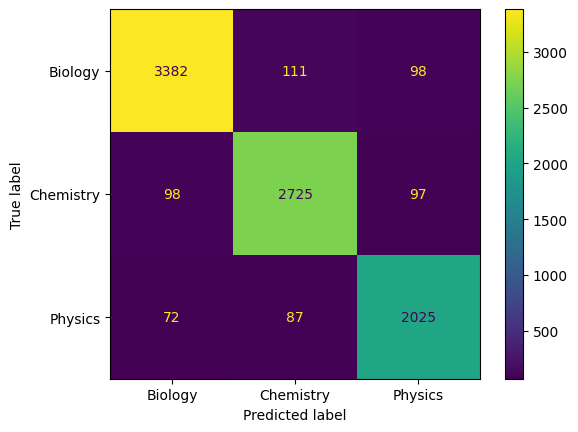

In [106]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_stop_train)

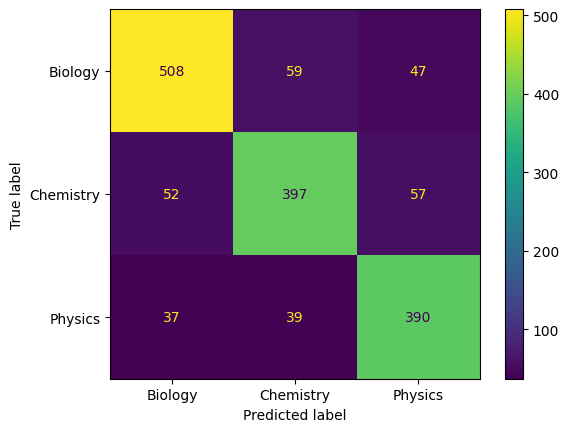

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stop_test)

In [108]:
len(gs_stop.best_estimator_[0].vocabulary_)

20594

In [109]:
len(cb[0].vocabulary_)

18177

Should it not stop words????

In [110]:
'THE' in gs_stop.best_estimator_[0].vocabulary_

True

Huh??????

In [111]:
l_words=sorted(gs_stop.best_estimator_[0].vocabulary_.keys())

In [112]:
field_anal('280111560_Bisphenol_A_and_its_structural_analogues_in_household_waste_paper')

,count
Biology,1
Chemistry,1


In [113]:
gs_stop.predict(['280111560_Bisphenol_A_and_its_structural_analogues_in_household_waste_paper'])

array(['Biology'], dtype='<U9')

Howwwww???????????

#Let's not supervise alright

In [114]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [115]:
unsup=make_pipeline(CountVectorizer(stop_words='english',lowercase=False),KMeans())

In [116]:
unsup.fit(X_list)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, stop_words='english')),
                ('kmeans', KMeans())])

In [117]:
unsup[-1].labels_.shape

(8695,)

In [118]:
X_unsup_trans=CountVectorizer(stop_words='english',lowercase=False).fit_transform(X_list)

In [119]:
ss=[]
for i in range(2,10):
  km=KMeans(n_clusters=i)
  km.fit(X_unsup_trans)
  ss.append(silhouette_score(X_unsup_trans,km.labels_))

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

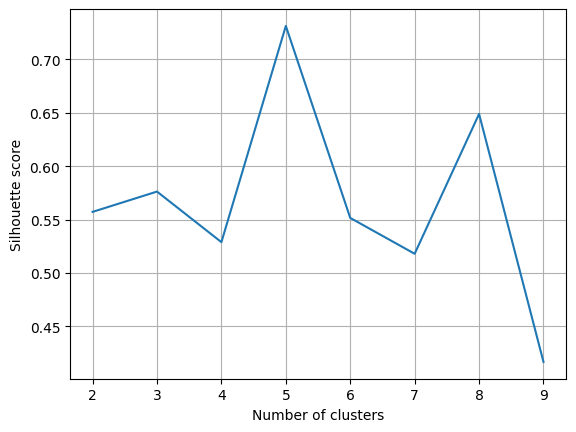

In [121]:
plt.plot(range(2,10), ss)
plt.xticks(range(2,10))

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

In [122]:
print(np.argmax(ss)+2)

5


so two clusters it is eh!!

In [123]:
km=KMeans(n_clusters=2)
km.fit(X_unsup_trans)
lbs=km.labels_

#There will be two clusters

a `0` class

and

a `1` class

In [124]:
y_train[lbs==1].value_counts()

,count
Topic,
Biology,3465
Chemistry,2819
Physics,2067


Not a good cluster as it has basically put all of it in one cluster and put some others outside.



In [125]:
y_train[lbs==0].value_counts()

,count
Topic,
Biology,126
Physics,117
Chemistry,101


In [126]:
X_train[lbs==0]

,Comment
0,A few things. You might have negative- frequen...
45,I think you have an unjustifiably idealistic v...
66,I’m not sure if your university is the same as...
183,I think we've converged on most points.\n\nFor...
209,"Hirsch isn't looking to ""recreate the plots ex..."
...,...
8406,"In terms of money, think in terms of training ..."
8507,Well to start with we don't know enough about ...
8557,"There are many, many biology grads who thought..."
8579,that makes a lot of sense thanks! does that me...


In [127]:
X_train["Comment"][2024]

'There\'s no sterile neutrino that\'s been discovered. When physicists talk about how we *know* the universe works, there\'s three active neutrinos and no steriles. There\'s always searches for new physics going on, and people look in the most likely places (whether that seems most likely because of theory, or because of data).\\n\\nThere are unexplained experimental signals from two experiments, LSND and MiniBooNE that could both be simultaneously explained by a sterile neutrino at around 1eV^2. This was far from enough for physicists to consider it a discovery, but it\'s a very, very good reason to do experiments to clarify.\\n\\nPhysicists don\'t consider the sterile neutrino to exist, it\'s considered a plausible hypothetical.\\n\\nBut the LSND-MiniBooNE data exist. It shows something not understood that needs to be. Part of the reason that LSND and MiniBooNE together is compelling is that they\'re almost  completely different in the way they work, they\'re completely different typ

In [128]:
X_train["Comment"][6134]

"Let's see how the BBC author did.\\n\\n>a key component of the matter that makes up our everyday lives.\\n\\nwell, I don't think sterile neutrinos really are a key component of the matter that makes up our every day life (and I say this as someone who loves neutrinos far more than average). Every day life is about electrons, photons, up quarks, down quarks, and gluons. You could maybe make a case to include muons\\n\\n>The search failed to find the particle, known as the sterile neutrino.\\n\\nokay, sort of true, but really they didn't test neutrino oscillations, they tested the MiniBooNE low energy excess and disfavored that at solid significance.\\n\\n> This will now direct physicists towards even more interesting theories to help explain how the Universe came to be.\\n\\nthis is just making things up.\\n\\n>That is because a sizeable proportion of physicists have been developing their theories on the basis that the existence of the sterile neutrino was a possibility. \\n\\nThis is 

In [129]:
for i in range(len(X_list)):
  if 'neutrino' in X_list[i].lower():
    print(i,".",len(X_train["Comment"][i]))

134 . 46
138 . 519
183 . 1580
926 . 1249
943 . 656
1028 . 1003
2024 . 3957
2099 . 127
2347 . 360
2728 . 669
2802 . 683
2809 . 67
2819 . 1288
2941 . 214
3615 . 1059
3804 . 163
3907 . 198
4325 . 405
5148 . 1149
5250 . 299
6114 . 372
6134 . 2783
7120 . 516
7133 . 131
7333 . 52
8478 . 39


#Those two are long af!!!

In [130]:
for i in range(len(X_list)):
  if 'miniboone' in X_list[i].lower():
    print(i,".",X_train["Comment"][i])

2024 . There's no sterile neutrino that's been discovered. When physicists talk about how we *know* the universe works, there's three active neutrinos and no steriles. There's always searches for new physics going on, and people look in the most likely places (whether that seems most likely because of theory, or because of data).\n\nThere are unexplained experimental signals from two experiments, LSND and MiniBooNE that could both be simultaneously explained by a sterile neutrino at around 1eV^2. This was far from enough for physicists to consider it a discovery, but it's a very, very good reason to do experiments to clarify.\n\nPhysicists don't consider the sterile neutrino to exist, it's considered a plausible hypothetical.\n\nBut the LSND-MiniBooNE data exist. It shows something not understood that needs to be. Part of the reason that LSND and MiniBooNE together is compelling is that they're almost  completely different in the way they work, they're completely different types of neu

In [131]:
for i in range(len(X_list)):
  if 'MiniBooNE' in X_list[i]:
    print(i,".",X_train["Comment"][i])

2024 . There's no sterile neutrino that's been discovered. When physicists talk about how we *know* the universe works, there's three active neutrinos and no steriles. There's always searches for new physics going on, and people look in the most likely places (whether that seems most likely because of theory, or because of data).\n\nThere are unexplained experimental signals from two experiments, LSND and MiniBooNE that could both be simultaneously explained by a sterile neutrino at around 1eV^2. This was far from enough for physicists to consider it a discovery, but it's a very, very good reason to do experiments to clarify.\n\nPhysicists don't consider the sterile neutrino to exist, it's considered a plausible hypothetical.\n\nBut the LSND-MiniBooNE data exist. It shows something not understood that needs to be. Part of the reason that LSND and MiniBooNE together is compelling is that they're almost  completely different in the way they work, they're completely different types of neu

In [132]:
lengths=[]
for i in range(len(X_list)):
  lengths.append(len(X_list[i]))

In [133]:
lens=pd.Series(lengths)

In [134]:
X_train["Comment"][lens.argmax()]

'Here’s a lengthy quote where you rejected that claim I made above. \\n\\n““>The fundamental point is that when it comes to capturing carbon, the way the CO2 was generated doesn’t affect the energy required to capture it at all. [I said this, and you rejected this claim in the following]\\n\\nIf you mean:  the amount of energy required to re-uptake the CO2 from the atmosphere has no relation to the energy that was spent in releasing and mixing the CO2 into the atmosphere, then you\'re very simply wrong about this.  \\n\\n... \\n\\nregardless of the "implementation" of the process, man-made or natural, it is absolutely the case that when you mix the CO2 into the atmosphere, \\_energy is spent\\_.  And if that CO2 is taken back, energy is spent again, and the amount on this "uptake" is \\_necessarily at least as much as on the first mixing\\_ --- *in practice*, it\'s a lot more.   This is very straightforward thermodynamics -- it\'s why and how a perpetual motion machine is impossible.  

In [135]:
lengths[lens.argmax()]

7298

In [136]:
lens.mean()

169.38976423231742

# After this let's filter a new training dataset with above average verbosity.

In [164]:
fil_pipe=make_pipeline(CountVectorizer(lowercase=False,max_df=0.7,vocabulary=None,stop_words='english'),MultinomialNB())

In [165]:
fil_pipe.fit(X_list,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, max_df=0.7,
                                 stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [166]:
fil_pipe.score(X_list,y_train)

0.8679700977573318

In [167]:
fil_pipe.score(X_test,y_test)

0.8436317780580076

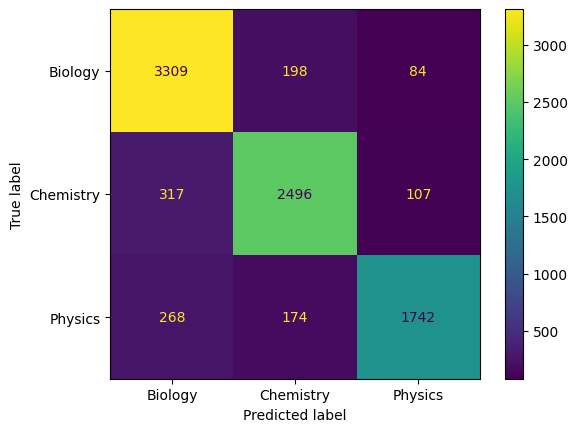

In [168]:
ConfusionMatrixDisplay.from_estimator(fil_pipe,X_list,y_train)

In [169]:
print(classification_report(y_train,fil_pipe.predict(X_list)))

              precision    recall  f1-score   support

     Biology       0.85      0.92      0.88      3591
   Chemistry       0.87      0.85      0.86      2920
     Physics       0.90      0.80      0.85      2184

    accuracy                           0.87      8695
   macro avg       0.87      0.86      0.86      8695
weighted avg       0.87      0.87      0.87      8695



In [175]:
gs_for_filtering=GridSearchCV(make_pipeline(CountVectorizer(),MultinomialNB()),{'countvectorizer__max_df':[0.2,0.3,0.4,0.5,0.6,0.7,0.8],'countvectorizer__stop_words':['english',None]},cv=5,
                              scoring='f1')

In [176]:
gs_for_filtering.fit(X_list,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                     0.7, 0.8],
                         'countvectorizer__stop_words': ['english', None]},
             scoring='f1')

In [177]:
print(classification_report(y_train,gs_for_filtering.predict(X_list)))

              precision    recall  f1-score   support

     Biology       0.84      0.91      0.88      3591
   Chemistry       0.86      0.84      0.85      2920
     Physics       0.89      0.79      0.84      2184

    accuracy                           0.86      8695
   macro avg       0.86      0.85      0.85      8695
weighted avg       0.86      0.86      0.86      8695



In [178]:
print(classification_report(y_test,gs_for_filtering.predict(X_test)))

              precision    recall  f1-score   support

     Biology       0.90      0.84      0.87       614
   Chemistry       0.80      0.86      0.83       506
     Physics       0.85      0.86      0.85       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.85      0.85      0.85      1586



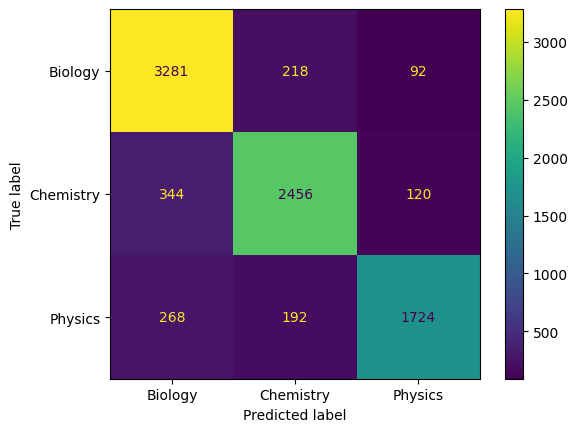

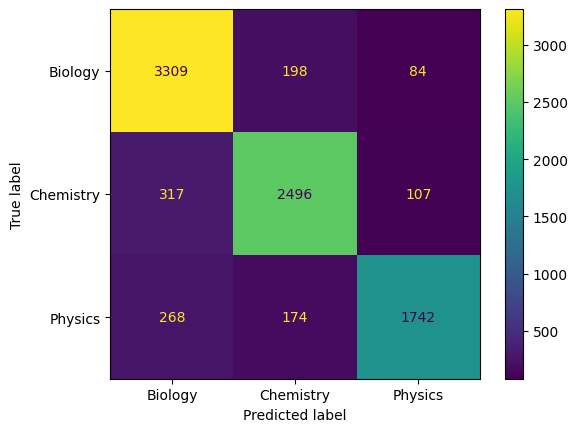

In [182]:
ConfusionMatrixDisplay.from_estimator(gs_for_filtering,X_list,y_train)
ConfusionMatrixDisplay.from_estimator(fil_pipe,X_list,y_train)

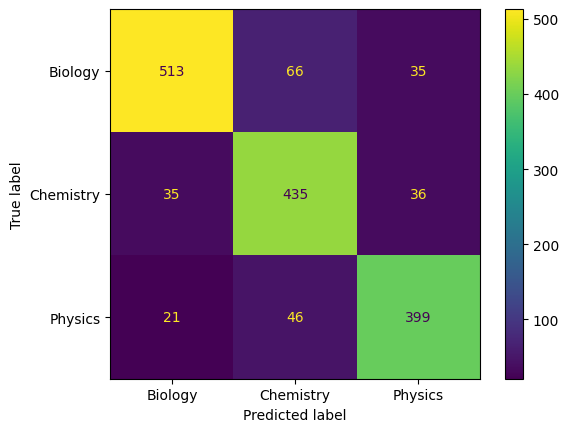

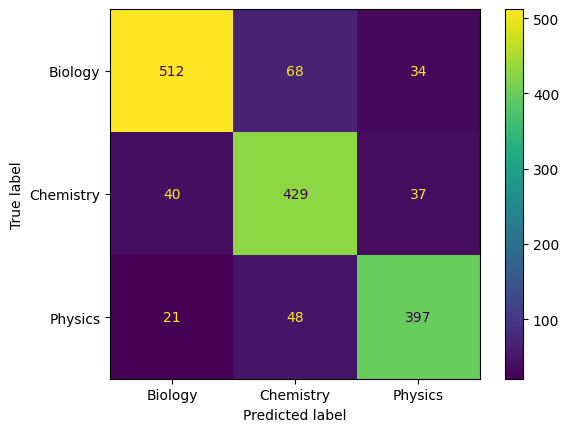

In [183]:
ConfusionMatrixDisplay.from_estimator(gs_for_filtering,X_test,y_test)
ConfusionMatrixDisplay.from_estimator(fil_pipe,X_test,y_test)

One funny observation: Look at the bottom left position. In all four confusion matrices. The count of Bio classified as physics is coincidentally constant!!!


How about we compare if they are same.